In [ ]:
# Generating random cities certainly leads to some interesting weather data.

# 2 things occured within the Temperature vs Latitude graph, one expected and
# the other unexcepted.  The expected aspect of the graph was for the data to
# form an arch going along with the theme of having temperature increase as we
# get closer to the equater.  However, the data peaked around 20 degrees, not
# around the equator.  I found this odd until I remembered reading about how
# India was going currently through a record heat wave.  When I looked up the 
# coordinates for the country, sure enough the latitude matched up.  This would
# certainly be something to investigate further.

# While cloudiness and windspeed had some patterns to them, they appeared to be
# fairly random.  Humidity also appeared random but I found the average to be a
# bit high (around 70%).  I assumed it would hover around the 50% mark. 
# Another point that could be investigated further.


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key
from citipy import citipy
import openweathermapy.core as owm
import csv
import os
from scipy import stats

settings={"units": "metric", "appid": api_key}


In [3]:
# This loop generated 2000 random latitudes and longitudes for cities
#using citipy and puts the cities into the cities list. 

latitude_range=(-90,90)
longitude_range=(-180,180)

latitude_longitude=[]
cities=[]


latitude=np.random.uniform(low=-90.000, high=90.000, size=2000)
longitude=np.random.uniform(low=-180.000, high=180.000, size=2000)
latitude_longitude=zip(latitude, longitude)


for x in latitude_longitude:
    city=citipy.nearest_city(x[0], x[1]).city_name
    
    if city not in cities:
        cities.append(city)
 


city_list=[]
city_latitude=[]
city_temperature=[]
city_humidity=[]
city_clouds=[]
city_wind=[]


# This loop is needed for a very specific reason.  When first trying out, I kept
# getting an "HTTP Error 404: Not Found" error.  After some reason, I found that
# some of the city names produced with citipy did not match up with the names with
# openweathermapy. This loop corrects this problem by simply removing the city if
# it does not match a city in openweathermapy while continuing the loop.

# The city name that made me realize this was the city "Asau".  Both Somoa and Tuvalu
# have cities with this name but citipy does not differentiate between the two due to
# it just using coordinates to find a city.  Adding except: continue worked around 
# this issue.

for city in cities:
    try:
        city_list.append(city)
        current_weather=owm.get_current(city, units="metric", appid=api_key)
        city_latitude.append(current_weather["coord"]["lat"])
        city_temperature.append(current_weather["main"]["temp"])
        city_humidity.append(current_weather["main"]["humidity"])
        city_clouds.append(current_weather["clouds"]["all"])
        city_wind.append(current_weather["wind"]["speed"])
    except:
        city_list.remove(city)
        continue


750
664
664


In [4]:
#Cap these at 100 since they are percentages.
for k in range(len(city_humidity)):
    if city_humidity[k]>100:
        city_humidity[k]=100


for m in range(len(city_clouds)):
        if city_clouds[m]>100:
            city_clouds[m]=100
        

In [5]:
#Save cities as csv

city_zip=zip(city_list)

with open(os.path.join("city_list.csv"), "w", newline="") as city_csv:
    writer=csv.writer(city_csv)

    writer.writerow(["City Name"])

    writer.writerows(city_zip)

In [6]:
#Formatting temp was causing each point to be displayed on the y axis, unsorted.
#Removing the formatting fixed issues with the y axis.
#Changed wind speed from meters per second to mph.
#Changed temperature to fahrenheit.

weather_almanac={
            "City": city_list, "Latitude": city_latitude,
            "Temperature (F)": city_temperature, "Humidity (%)": city_humidity,
            "Cloudiness (%)": city_clouds, "Wind Speed (mph)": city_wind
            }



weather_df=pd.DataFrame(weather_almanac)
weather_df=weather_df.set_index("City")


weather_df["Temperature (F)"]=round(((9/5)*(weather_df["Temperature (F)"]) + 32), 2)

weather_df["Wind Speed (mph)"]=round((weather_df["Wind Speed (mph)"]*(3600/1609.344)), 2)

weather_df.head()

,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
City,,,,,
namibe,-15.19,65.01,83,95,7.58
jamestown,-33.21,39.99,91,37,6.76
esna,45.20,60.80,77,40,6.93
kodiak,39.95,88.09,13,1,9.17
geraldton,49.72,75.20,60,75,16.11


<function matplotlib.pyplot.show(*args, **kw)>

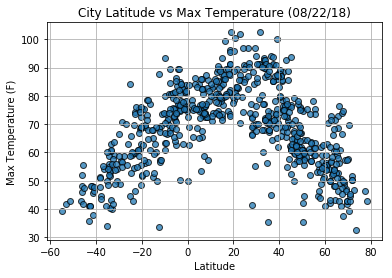

In [7]:
#Temperature scatter plot.

plt.title("City Latitude vs Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


plt.scatter( \
    weather_df["Latitude"], weather_df["Temperature (F)"], edgecolor="black",  \
    alpha=.75, linewidth=1, marker="o"
    )



plt.grid()
plt.savefig("Latitude vs Max Temperature (F).png")
plt.show

70.42319277108433


<function matplotlib.pyplot.show(*args, **kw)>

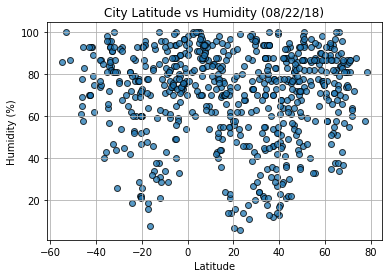

In [14]:
#Humidity scatter plot.

plt.title("City Latitude vs Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(weather_df["Humidity (%)"].mean())

plt.scatter( \
    weather_df["Latitude"], weather_df["Humidity (%)"], edgecolor="black",  \
    alpha=.75, linewidth=1, marker="o"
    )



plt.grid()
plt.savefig("Humidity vs Max Temperature (F).png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

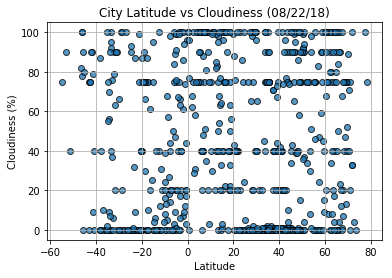

In [12]:
#Cloud scatter plot.

plt.title("City Latitude vs Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.scatter( \
    weather_df["Latitude"], weather_df["Cloudiness (%)"], edgecolor="black",  \
    alpha=.75, linewidth=1, marker="o"
    )



plt.grid()
plt.savefig("Latitude vs Cloudiness (%).png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

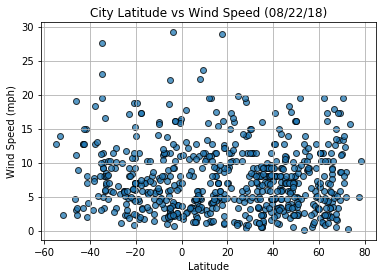

In [13]:
#Wind speed scatter plot.

plt.title("City Latitude vs Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter( \
    weather_df["Latitude"], weather_df["Wind Speed (mph)"], edgecolor="black",  \
    alpha=.75, linewidth=1, marker="o"
    )



plt.grid()
plt.savefig("Latitude vs Wind Speed (mph).png")
plt.show